In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dat = pd.read_csv("data.csv", header = 1)

In [13]:
dat.columns

Index(['page_type', 'page_path', 'week', 'total_visitors', 'total_sessions',
       'total_carts', 'total_checkouts', 'total_orders_placed',
       'total_bounce_rate'],
      dtype='object')

In [70]:
dat.total_bounce_rate = dat.total_bounce_rate.apply(lambda x: float(x[:-1]))

In [72]:
weekly_bounce_rate = dat[["week","total_bounce_rate"]].groupby("week").mean()

In [91]:
weekly_visitors = dat[["week", "total_visitors", "total_sessions"]].groupby("week").sum()
weekly_avg_visitors = dat[["week", "total_visitors", "total_sessions"]].groupby("week").mean()

<AxesSubplot:xlabel='week'>

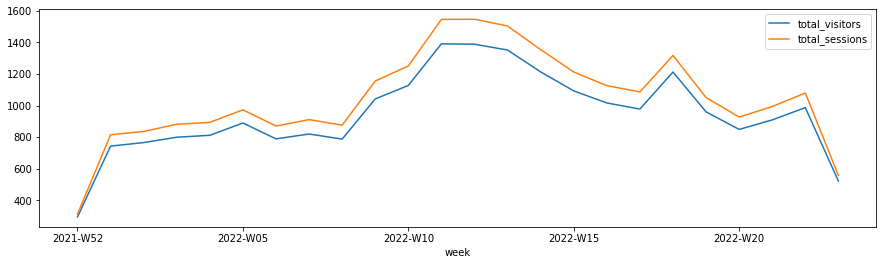

In [180]:
weekly_avg_visitors.plot(figsize=(15,4))

In [93]:
count = dat[["week", "total_visitors"]].groupby("week").count()

In [20]:
funnel = dat[['week', 'total_carts', 'total_checkouts', 'total_orders_placed']].groupby("week").sum()

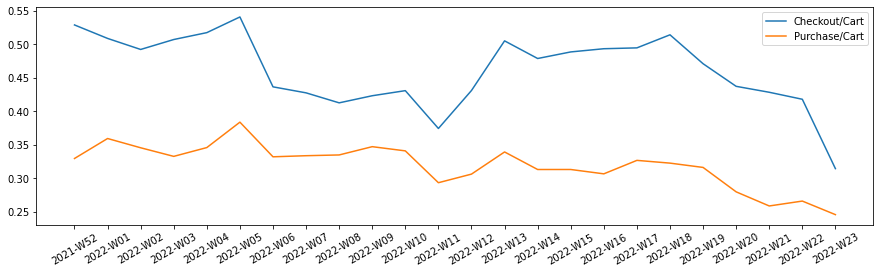

In [60]:
plt.figure(figsize = (15,4))
plt.xticks(rotation=30)
t1 = funnel.total_checkouts/funnel.total_carts
t2 = funnel.total_orders_placed/funnel.total_carts
plt.plot(t1, label = "Checkout/Cart")
plt.plot(t2, label = "Purchase/Cart")
plt.legend()
plt.show()

In [204]:
a = dat.groupby(["week","page_type"]).count().reset_index()

In [227]:
a = a.set_index("week")

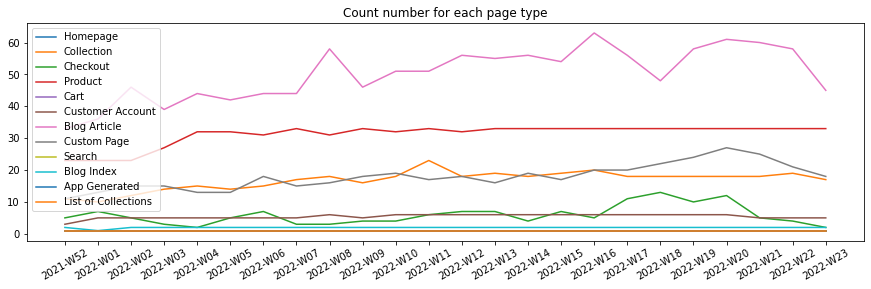

In [237]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
for each in dat.page_type.unique():
    plt.plot(a[a.page_type == each].total_visitors, label = each)
plt.title("Count number for each page type")
plt.legend()
plt.show()

<AxesSubplot:xlabel='page_type'>

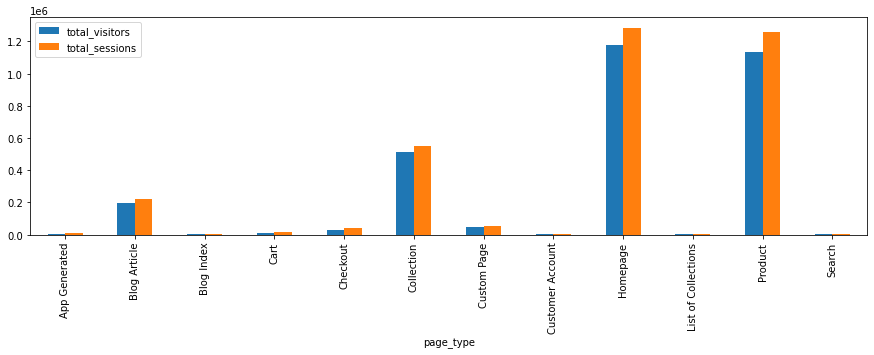

In [169]:
dat[["page_type",'total_visitors', 'total_sessions']].groupby("page_type").sum().plot.bar(figsize=(15, 4))

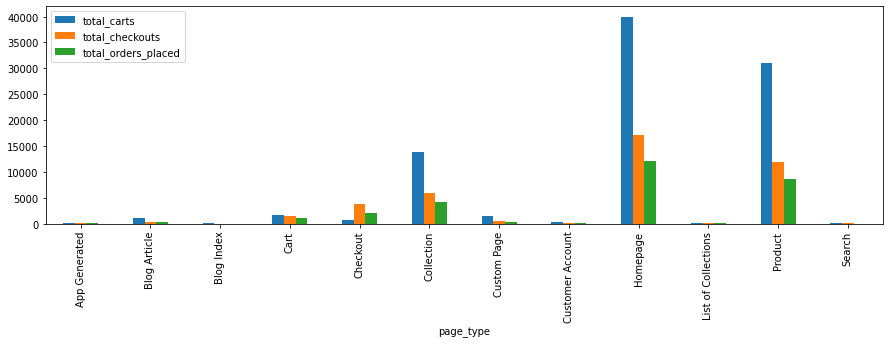

In [168]:
dat[["page_type", 'total_carts', 
     'total_checkouts', 'total_orders_placed']].groupby("page_type").sum().plot.bar(figsize=(15, 4)).legend(loc=2) 

In [240]:
b = dat[["page_type", 'total_carts', 
     'total_checkouts', 'total_orders_placed']].groupby("page_type").sum()

In [246]:
b

,total_carts,total_checkouts,total_orders_placed
page_type,,,
App Generated,120,66,43
Blog Article,1107,395,275
Blog Index,37,22,13
Cart,1765,1392,1038
Checkout,758,3735,2035
Collection,13795,5930,4276
Custom Page,1490,591,396
Customer Account,275,213,163
Homepage,39996,17073,12048


In [142]:
combine = pd.concat([t1,t2,weekly_visitors,weekly_avg_visitors,weekly_bounce_rate,count], axis = 1)

In [143]:
combine.columns = ["t1","t2","weekly_sum_visitors","weekly_sum_sessions","weekly_sum_visitors",
                   "weekly_sum_sessions", "weekly_avg_bounce_rate","count"]

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

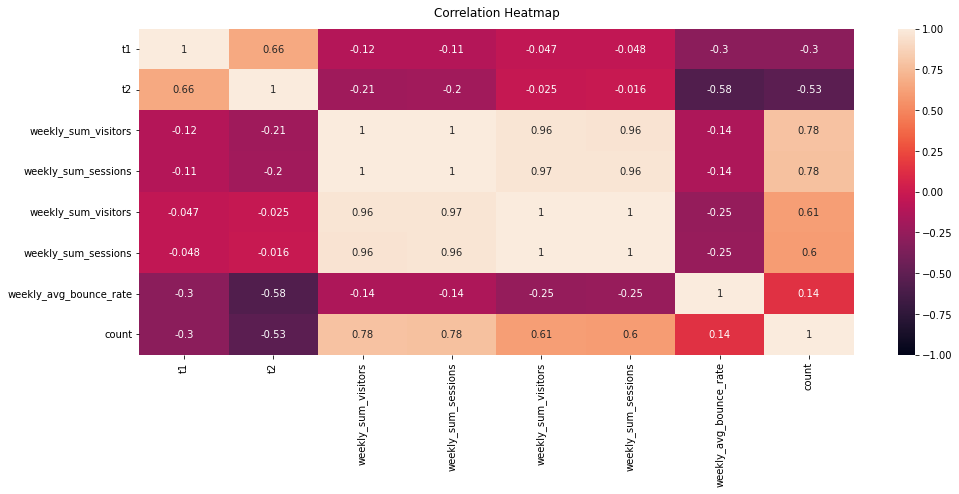

In [145]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(combine.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:xlabel='week'>

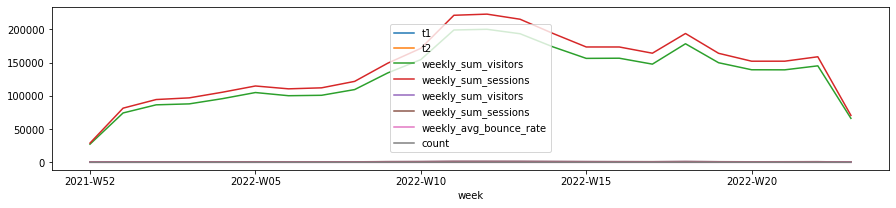

In [176]:
combine.plot(figsize = (15,3))

<AxesSubplot:xlabel='week'>

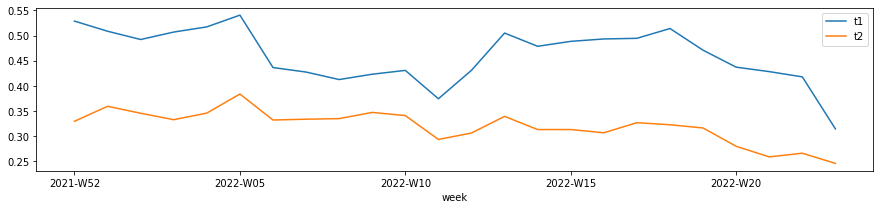

In [178]:
combine[["t1","t2"]].plot(figsize = (15,3))